In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("UberDataset.csv")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# Let's explore number of rows and columns in this dataset
df.shape

(1156, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preprocessing 

In [7]:
df['PURPOSE'].fillna('NOT', inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\2086327740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT', inplace = True)


In [8]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
# Let's Change to the Datatype of Start Date and End Date from Object to Datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [20]:
# Here I Would like to add more two columns as Date and Time
from datetime import datetime
df['date'] = pd.DatetimeIndex(df['START_DATE'].dt.date)

In [21]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [24]:
df['time'] = df['START_DATE'].dt.hour

In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [26]:
# Here for EDA i would like to make another column to decide time as Morning, After noon, Evening, Night
df['Day_night'] = pd.cut(x=df['time'], bins = [0,10,15,19,24], labels = ['Morning', 'After Noon', 'Evening', 'Night'])

In [27]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon


In [28]:
df.dropna(inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    datetime64[ns]
 8   time        413 non-null    float64       
 9   Day_night   413 non-null    category      
dtypes: category(1), datetime64[ns](3), float64(2), object(4)
memory usage: 32.9+ KB


In [ ]:
# Now almost we have done with Data Pre-processing now Let's go ahead towards data visualization


### Data Visualization

#### In Which Category do people book the most uber rides?

C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3649277532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3649277532.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3649277532.py:30: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


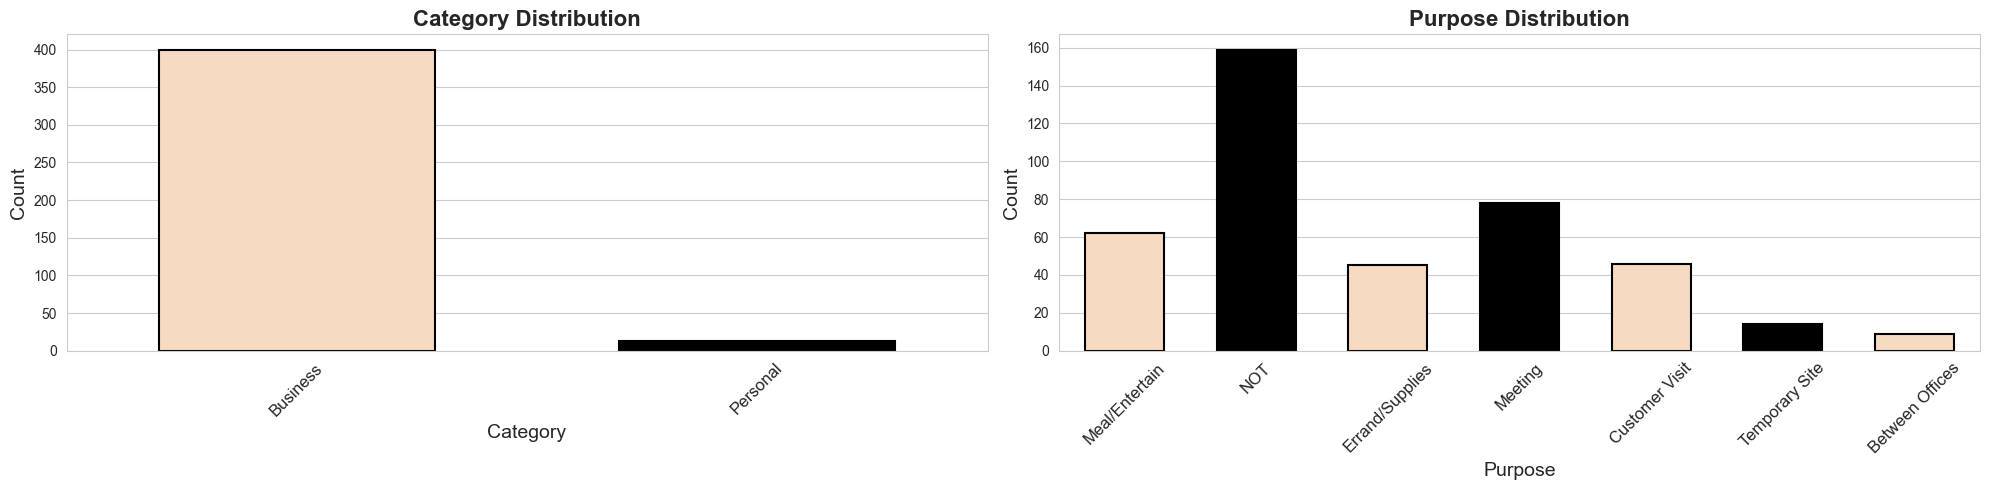

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")

# Custom palette with peach and black
custom_palette = ['peachpuff', 'black']

# Create the plot figure
plt.figure(figsize=(20, 5))

# First subplot: CATEGORY
plt.subplot(1, 2, 1)
sns.countplot(
    data=df, 
    x='CATEGORY', 
    palette=custom_palette, 
    edgecolor='black',  # Adds a black outline
    linewidth=1.5,      # Thickness of the outline
    width=0.6           # Adjusts the width of the bars
)
plt.title('Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Second subplot: PURPOSE
plt.subplot(1, 2, 2)
sns.countplot(
    data=df, 
    x='PURPOSE', 
    palette=custom_palette, 
    edgecolor='black',  # Adds a black outline
    linewidth=1.5,      # Thickness of the outline
    width=0.6           # Adjusts the width of the bars
)
plt.title('Purpose Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Display the side-by-side subplots
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()


##### Here People are using most of rides for business category for meetings followed by meal/Entertain and so on


### Day Vs Night Distribution 

C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3030608995.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3030608995.py:10: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


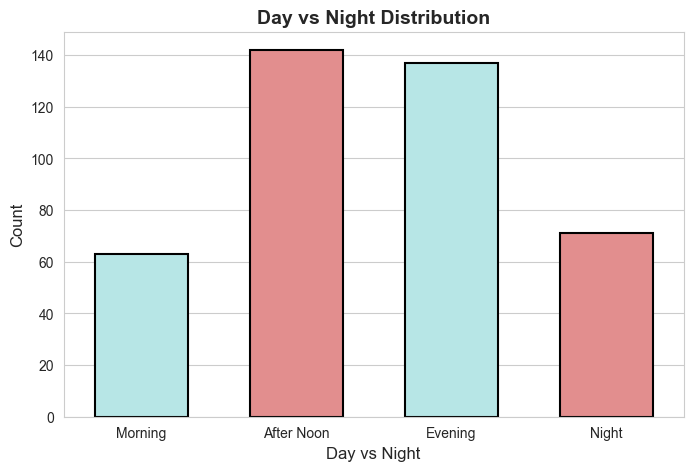

In [44]:
# Set a professional style
sns.set_style("whitegrid")

# Custom color palette: light pastel teal and light coral
custom_palette = ['paleturquoise', 'lightcoral']

# Create the plot with a smaller figure size
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df, 
    x='Day_night', 
    palette=custom_palette, 
    edgecolor='black',  # Adds a black outline
    linewidth=1.5,      # Thickness of the outline
    width=0.6           # Adjusts the width of the bars
)

# Add titles and labels
plt.title('Day vs Night Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Day vs Night', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if necessary
plt.xticks(rotation=0, fontsize=10)

# Display the plot
plt.show()


#### People are using uber mostly at after noon, evening followed by night 

In [50]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month # we are extracting month from START_DATE

Month_label = {1.0 : 'Jan', 2.0 : 'Feb', 3.0 : 'Mar', 4.0 : 'Apr', 5.0 : 'May', 6.0 : 'June', 7.0 : 'Jul', 8.0 : 'Aug', 9.0 : 'Sep',
              10.0 : 'Oct', 11.0 : 'Nov', 12.0 : 'Dec'} # assigns string label to the months
df['month'] = df.month.map(Month_label) # it Replaces the number months with strings

mon  = df.month.value_counts(sort=False) # calculates the counts of every month

In [51]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Day_night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon,Jan


### Max ride by month

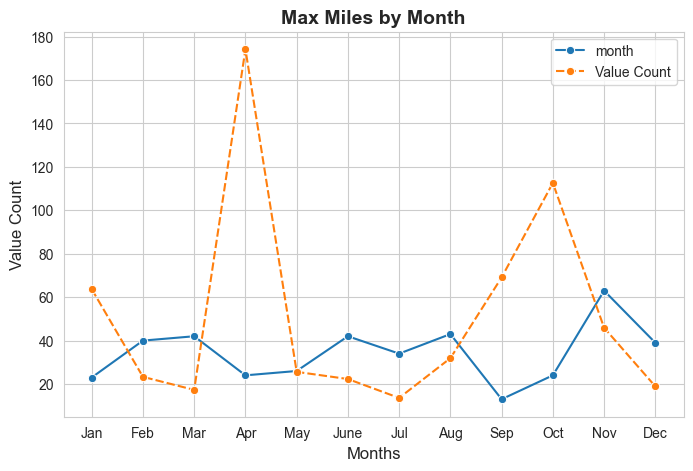

In [58]:

# Set a professional style
sns.set_style("whitegrid")

# Create the line plot with a smaller figure size
plt.figure(figsize=(8, 5))  # Reduced size
p = sns.lineplot(data=graph_data, marker='o', color='steelblue')

# Set labels and title
p.set(xlabel='Months', ylabel='Value Count', title='Max Miles by Month')

# Customize the title font
p.set_title('Max Miles by Month', fontsize=14, fontweight='bold')  # Adjust title size

# Adjust label font size
p.set_xlabel('Months', fontsize=12)
p.set_ylabel('Value Count', fontsize=12)

# Adjust the tick parameters for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


In [59]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Day_night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon,Jan


In [60]:
df['Day'] = df.START_DATE.dt.weekday
data_label = {
    0: "Monday", 1 : "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df['Day'] =  df['Day'].map(data_label)

In [61]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Day_night,month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon,Jan,Wednesday


C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3695901276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_label.index, y=day_label, palette=custom_palette)
C:\Users\siddh\AppData\Local\Temp\ipykernel_13052\3695901276.py:9: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=day_label.index, y=day_label, palette=custom_palette)


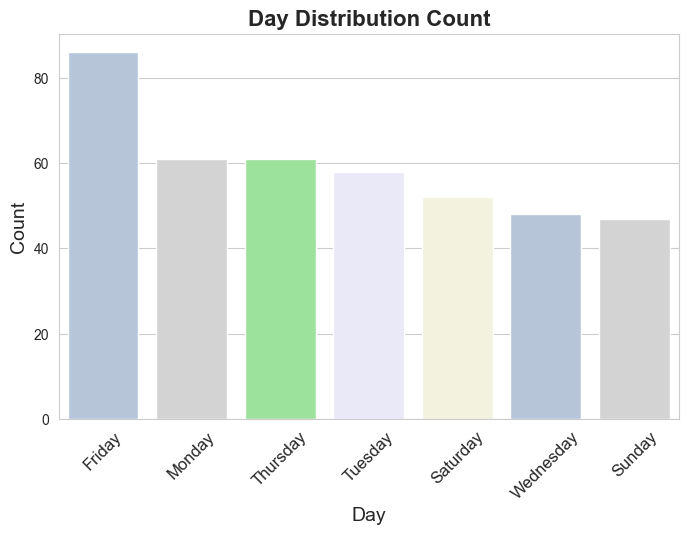

In [66]:

# Set a professional style
sns.set_style("whitegrid")

# Custom soft color palette
custom_palette = ['lightsteelblue', 'lightgray', 'lightgreen', 'lavender', 'beige']

# Create the bar plot without edge lines
plt.figure(figsize=(8, 5))
sns.barplot(x=day_label.index, y=day_label, palette=custom_palette)

# Add title and labels
plt.title('Day Distribution Count', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust the x-axis labels if necessary
plt.xticks(fontsize=12)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [67]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Day_night,month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,After Noon,Jan,Wednesday


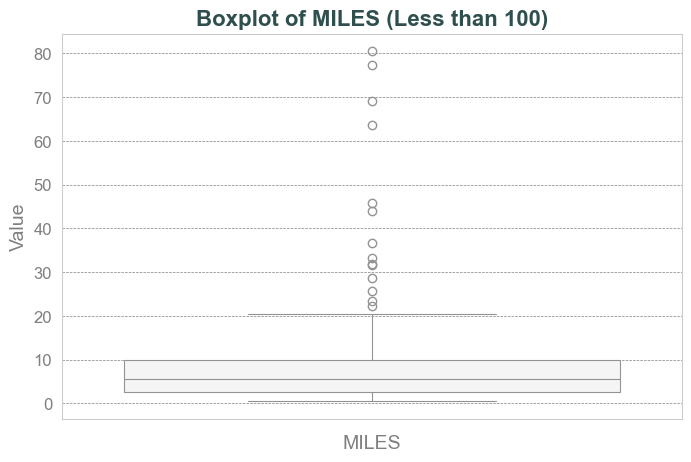

In [73]:

# Set a professional style
sns.set_style("whitegrid")

# Create the box plot with refined colors and thinner lines
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['MILES'] < 100], y='MILES', color='whitesmoke', linewidth=0.8)

# Add title and labels with professional styling
plt.title('Boxplot of MILES (Less than 100)', fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel('MILES', fontsize=14, color='gray')
plt.ylabel('Value', fontsize=14, color='gray')

# Adjust the tick parameters for better readability
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Display minimal gridlines
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')

# Show the plot
plt.show()


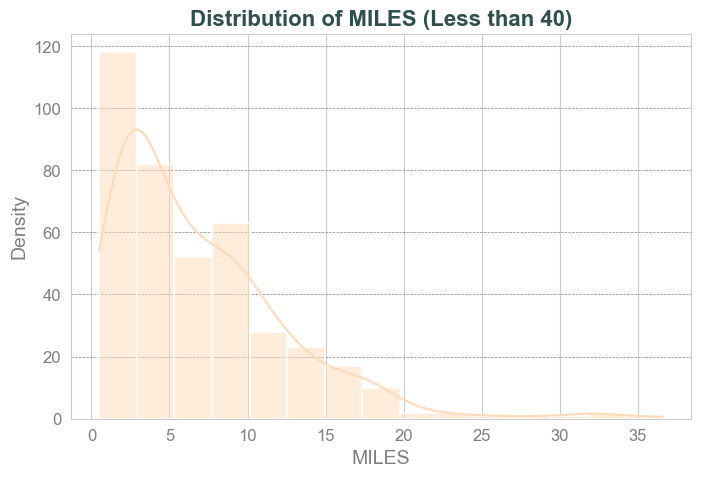

In [76]:

# Set a professional style
sns.set_style("whitegrid")

# Create the histogram plot with peach color and refined settings
plt.figure(figsize=(8, 5))
sns.histplot(df[df['MILES'] < 40]['MILES'], kde=True, color='peachpuff', bins=15, linewidth=1.2)

# Add title and labels with professional styling
plt.title('Distribution of MILES (Less than 40)', fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel('MILES', fontsize=14, color='gray')
plt.ylabel('Density', fontsize=14, color='gray')

# Adjust the tick parameters for better readability
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Display gridlines for better clarity
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')

# Show the plot
plt.show()


### Conclusion